In [43]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch

import bars
import c
import d
import labels
import signals
import u

In [53]:
all_data = d.fetch_all("data/daily", index_col="Date", parse_dates=["Date"])
data = pd.concat(
    [df["Close/Last"].rename(ticker) for ticker, df in all_data.items()], axis=1
)
data.sort_index(inplace=True)
data.dropna(inplace=True)
data.head()

,BND,EEM,GLD,IEV,LQD,MCHI,QQQ,SLV,SPX,TLT,USO
Date,,,,,,,,,,,
2012-05-29,84.03,38.20,151.02,32.94,116.05,40.766,62.860,27.10,1332.42,123.02,273.84
2012-05-30,84.35,37.54,151.91,32.09,116.15,40.310,62.330,27.12,1313.32,126.14,264.16
2012-05-31,84.51,37.70,151.62,32.13,116.97,40.600,62.060,26.96,1310.33,127.60,260.88
2012-06-01,84.62,36.69,157.50,31.45,117.29,39.670,60.409,27.62,1278.04,130.36,251.44
2012-06-04,84.41,36.85,157.32,31.67,116.40,39.470,60.870,27.46,1278.18,129.33,254.08


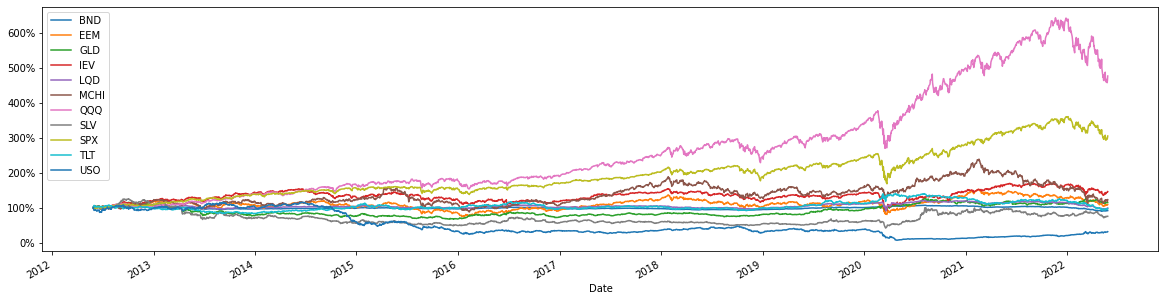

In [57]:
import matplotlib.ticker as mtick

plt.rcParams["figure.figsize"] = (20, 5)

normalized = data.divide(data.iloc[0])
ax = normalized.plot()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.legend()

In [58]:
returns = data / data.shift(1) - 1
returns.dropna(inplace=True)
returns.head()

,BND,EEM,GLD,IEV,LQD,MCHI,QQQ,SLV,SPX,TLT,USO
Date,,,,,,,,,,,
2012-05-30,0.003808,-0.017277,0.005893,-0.025804,0.000862,-0.011186,-0.008431,0.000738,-0.014335,0.025362,-0.035349
2012-05-31,0.001897,0.004262,-0.001909,0.001246,0.007060,0.007194,-0.004332,-0.005900,-0.002277,0.011574,-0.012417
2012-06-01,0.001302,-0.026790,0.038781,-0.021164,0.002736,-0.022906,-0.026603,0.024481,-0.024643,0.021630,-0.036185
2012-06-04,-0.002482,0.004361,-0.001143,0.006995,-0.007588,-0.005042,0.007631,-0.005793,0.000110,-0.007901,0.010500
2012-06-05,-0.002014,0.002578,-0.001144,0.003158,-0.002148,0.000507,0.004107,0.009468,0.005727,-0.013377,0.000000


In [60]:
corr = returns.corr()
corr

,BND,EEM,GLD,IEV,LQD,MCHI,QQQ,SLV,SPX,TLT,USO
BND,1.000000,0.043871,0.290601,0.003553,0.833680,-0.011774,0.009572,0.171041,0.000341,0.731762,-0.041515
EEM,0.043871,1.000000,0.119498,0.795472,0.172609,0.868825,0.727105,0.278521,0.768807,-0.253529,0.355418
GLD,0.290601,0.119498,1.000000,0.070045,0.274048,0.049874,0.007845,0.801087,0.003108,0.256820,0.088253
IEV,0.003553,0.795472,0.070045,1.000000,0.159226,0.616954,0.722980,0.244096,0.827547,-0.340815,0.349956
LQD,0.833680,0.172609,0.274048,0.159226,1.000000,0.102798,0.158085,0.211861,0.164771,0.610266,0.012769
MCHI,-0.011774,0.868825,0.049874,0.616954,0.102798,1.000000,0.635402,0.187772,0.611403,-0.218142,0.248791
QQQ,0.009572,0.727105,0.007845,0.722980,0.158085,0.635402,1.000000,0.160632,0.922303,-0.283972,0.259109
SLV,0.171041,0.278521,0.801087,0.244096,0.211861,0.187772,0.160632,1.000000,0.174414,0.093175,0.201482
SPX,0.000341,0.768807,0.003108,0.827547,0.164771,0.611403,0.922303,0.174414,1.000000,-0.360417,0.345095
TLT,0.731762,-0.253529,0.256820,-0.340815,0.610266,-0.218142,-0.283972,0.093175,-0.360417,1.000000,-0.208513


In [61]:
cov = returns.cov()
cov

,BND,EEM,GLD,IEV,LQD,MCHI,QQQ,SLV,SPX,TLT,USO
BND,7.992067e-06,0.000002,7.754136e-06,1.174236e-07,0.000011,-5.279041e-07,3.429598e-07,0.000008,1.026176e-08,0.000018,-0.000003
EEM,1.627725e-06,0.000172,1.480270e-05,1.220433e-04,0.000011,1.808522e-04,1.209466e-04,0.000060,1.074335e-04,-0.000029,0.000111
GLD,7.754136e-06,0.000015,8.908655e-05,7.728498e-06,0.000012,7.466097e-06,9.384312e-07,0.000124,3.123914e-07,0.000021,0.000020
IEV,1.174236e-07,0.000122,7.728498e-06,1.366562e-04,0.000009,1.143890e-04,1.071180e-04,0.000047,1.030043e-04,-0.000035,0.000098
LQD,1.124196e-05,0.000011,1.233804e-05,8.878553e-06,0.000023,7.777038e-06,9.557108e-06,0.000017,8.368395e-06,0.000026,0.000001
MCHI,-5.279041e-07,0.000181,7.466097e-06,1.143890e-04,0.000008,2.515556e-04,1.277284e-04,0.000049,1.032505e-04,-0.000030,0.000094
QQQ,3.429598e-07,0.000121,9.384312e-07,1.071180e-04,0.000010,1.277284e-04,1.606364e-04,0.000033,1.244638e-04,-0.000032,0.000078
SLV,7.950381e-06,0.000060,1.243211e-04,4.691750e-05,0.000017,4.896729e-05,3.347443e-05,0.000270,3.053428e-05,0.000013,0.000079
SPX,1.026176e-08,0.000107,3.123914e-07,1.030043e-04,0.000008,1.032505e-04,1.244638e-04,0.000031,1.133693e-04,-0.000034,0.000088
TLT,1.820908e-05,-0.000029,2.133650e-05,-3.506891e-05,0.000026,-3.045405e-05,-3.168001e-05,0.000013,-3.377863e-05,0.000077,-0.000044


In [62]:
dist = ((1 - corr) / 2.0) ** 0.5
dist

,BND,EEM,GLD,IEV,LQD,MCHI,QQQ,SLV,SPX,TLT,USO
BND,0.000000,0.691422,0.595566,0.705849,0.288375,0.711257,0.703715,0.643801,0.706986,0.366223,0.721635
EEM,0.691422,0.000000,0.663514,0.319788,0.643192,0.256100,0.369388,0.600616,0.339995,0.791685,0.567707
GLD,0.595566,0.663514,0.000000,0.681893,0.602475,0.689248,0.704328,0.315367,0.706007,0.609582,0.675184
IEV,0.705849,0.319788,0.681893,0.000000,0.648373,0.437634,0.372170,0.614778,0.293643,0.818784,0.570107
LQD,0.288375,0.643192,0.602475,0.648373,0.000000,0.669777,0.648812,0.627750,0.646231,0.441437,0.702578
MCHI,0.711257,0.256100,0.689248,0.437634,0.669777,0.000000,0.426965,0.637271,0.440793,0.780430,0.612866
QQQ,0.703715,0.369388,0.704328,0.372170,0.648812,0.426965,0.000000,0.647830,0.197101,0.801240,0.608643
SLV,0.643801,0.600616,0.315367,0.614778,0.627750,0.637271,0.647830,0.000000,0.642490,0.673359,0.631869
SPX,0.706986,0.339995,0.706007,0.293643,0.646231,0.440793,0.197101,0.642490,0.000000,0.824748,0.572235
TLT,0.366223,0.791685,0.609582,0.818784,0.441437,0.780430,0.801240,0.673359,0.824748,0.000000,0.777340


In [67]:
from scipy.spatial.distance import squareform

squareform_dist = squareform(dist)
link = sch.linkage(squareform_dist, "single")  # linkage matrix
link

array([[ 6.        ,  8.        ,  0.19710086,  2.        ],
       [ 1.        ,  5.        ,  0.2561005 ,  2.        ],
       [ 0.        ,  4.        ,  0.28837466,  2.        ],
       [ 3.        , 11.        ,  0.2936431 ,  3.        ],
       [ 2.        ,  7.        ,  0.31536742,  2.        ],
       [12.        , 14.        ,  0.31978771,  5.        ],
       [ 9.        , 13.        ,  0.36622265,  3.        ],
       [10.        , 16.        ,  0.56770677,  6.        ],
       [15.        , 17.        ,  0.59556634,  5.        ],
       [18.        , 19.        ,  0.60061606, 11.        ]])

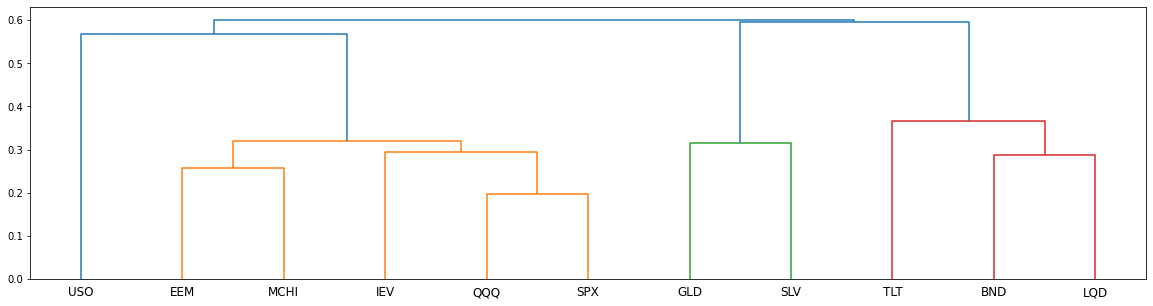

In [78]:
from scipy.cluster.hierarchy import dendrogram

dn = dendrogram(link, labels=dist.index)

In [70]:
from scipy.cluster.hierarchy import leaves_list

leaves = leaves_list(link)
quasi_diagonal = [corr.index[l] for l in leaves]
quasi_diagonal

['USO', 'EEM', 'MCHI', 'IEV', 'QQQ', 'SPX', 'GLD', 'SLV', 'TLT', 'BND', 'LQD']

<AxesSubplot:>

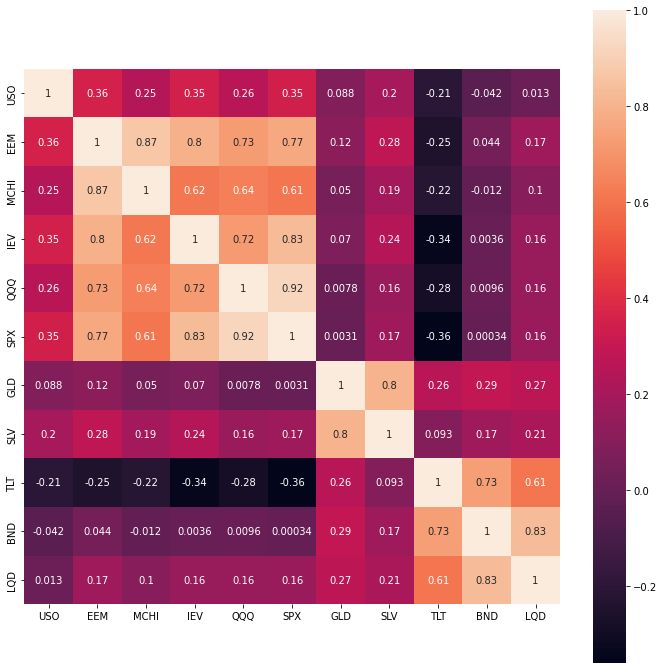

In [77]:
import seaborn as sns

plt.figure(figsize=(12, 12))
corr_quasi_diagonal = corr.reindex(quasi_diagonal)[quasi_diagonal]
sns.heatmap(corr_quasi_diagonal, annot=True, square=True)